In [11]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import pandas as pd
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(font_scale = 2)

%matplotlib inline
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
activation = 'relu'
batch_size = 128
neurons_number = 6400
epochs = 20
optimize = 'Adam'

In [4]:
# build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(neurons_number, input_shape=(1,), name='input', activation=activation))
model.add(keras.layers.Dense(neurons_number, activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(neurons_number, activation=activation))
# model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, name='output'))
# summary of the model
model.summary()
model.compile(optimizer=optimize, loss='mean_squared_error', metrics=['mse'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 6400)              12800     
_________________________________________________________________
dense_3 (Dense)              (None, 6400)              40966400  
_________________________________________________________________
dense_4 (Dense)              (None, 6400)              40966400  
_________________________________________________________________
dense_5 (Dense)              (None, 6400)              40966400  
_________________________________________________________________
output (Dense)               (None, 1)                 6401      
Total params: 122,918,401
Trainable params: 122,918,401
Non-trainable params: 0
_________________________________________________________________


In [5]:
X_train = np.linspace(0, 0.8, num=10000)
Y_train = X_train

In [6]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.2)

Epoch 1/20
63/63 [==============================] - 29s 453ms/step - loss: 0.1874 - mse: 0.1874 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 2/20
63/63 [==============================] - 29s 455ms/step - loss: 2.3288e-05 - mse: 2.3288e-05 - val_loss: 1.3365e-04 - val_mse: 1.3365e-04
Epoch 3/20
63/63 [==============================] - 29s 457ms/step - loss: 1.0745e-07 - mse: 1.0745e-07 - val_loss: 1.1040e-04 - val_mse: 1.1040e-04
Epoch 4/20
63/63 [==============================] - 29s 453ms/step - loss: 3.6680e-08 - mse: 3.6680e-08 - val_loss: 1.0301e-04 - val_mse: 1.0301e-04
Epoch 5/20
63/63 [==============================] - 29s 457ms/step - loss: 1.8349e-08 - mse: 1.8349e-08 - val_loss: 9.0135e-05 - val_mse: 9.0135e-05
Epoch 6/20
63/63 [==============================] - 29s 456ms/step - loss: 1.5354e-08 - mse: 1.5354e-08 - val_loss: 8.7803e-05 - val_mse: 8.7803e-05
Epoch 7/20
63/63 [==============================] - 29s 459ms/step - loss: 7.7668e-09 - mse: 7.7668e-09 - val_loss: 8.1821

In [15]:
X_test = np.linspace(0, 0.8, num=333)
Y_test = X_test

loss, mse = model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 25ms/step - loss: 1.4557e-05 - mse: 1.4557e-05


In [12]:
grid = np.linspace(0, 1.0, 150)
predicted = model.predict(grid).reshape((150,))

references = pd.DataFrame({'X': grid, 'Y_reference': grid})
predictions = pd.DataFrame({'X': grid, 'Y_predicted': predicted})

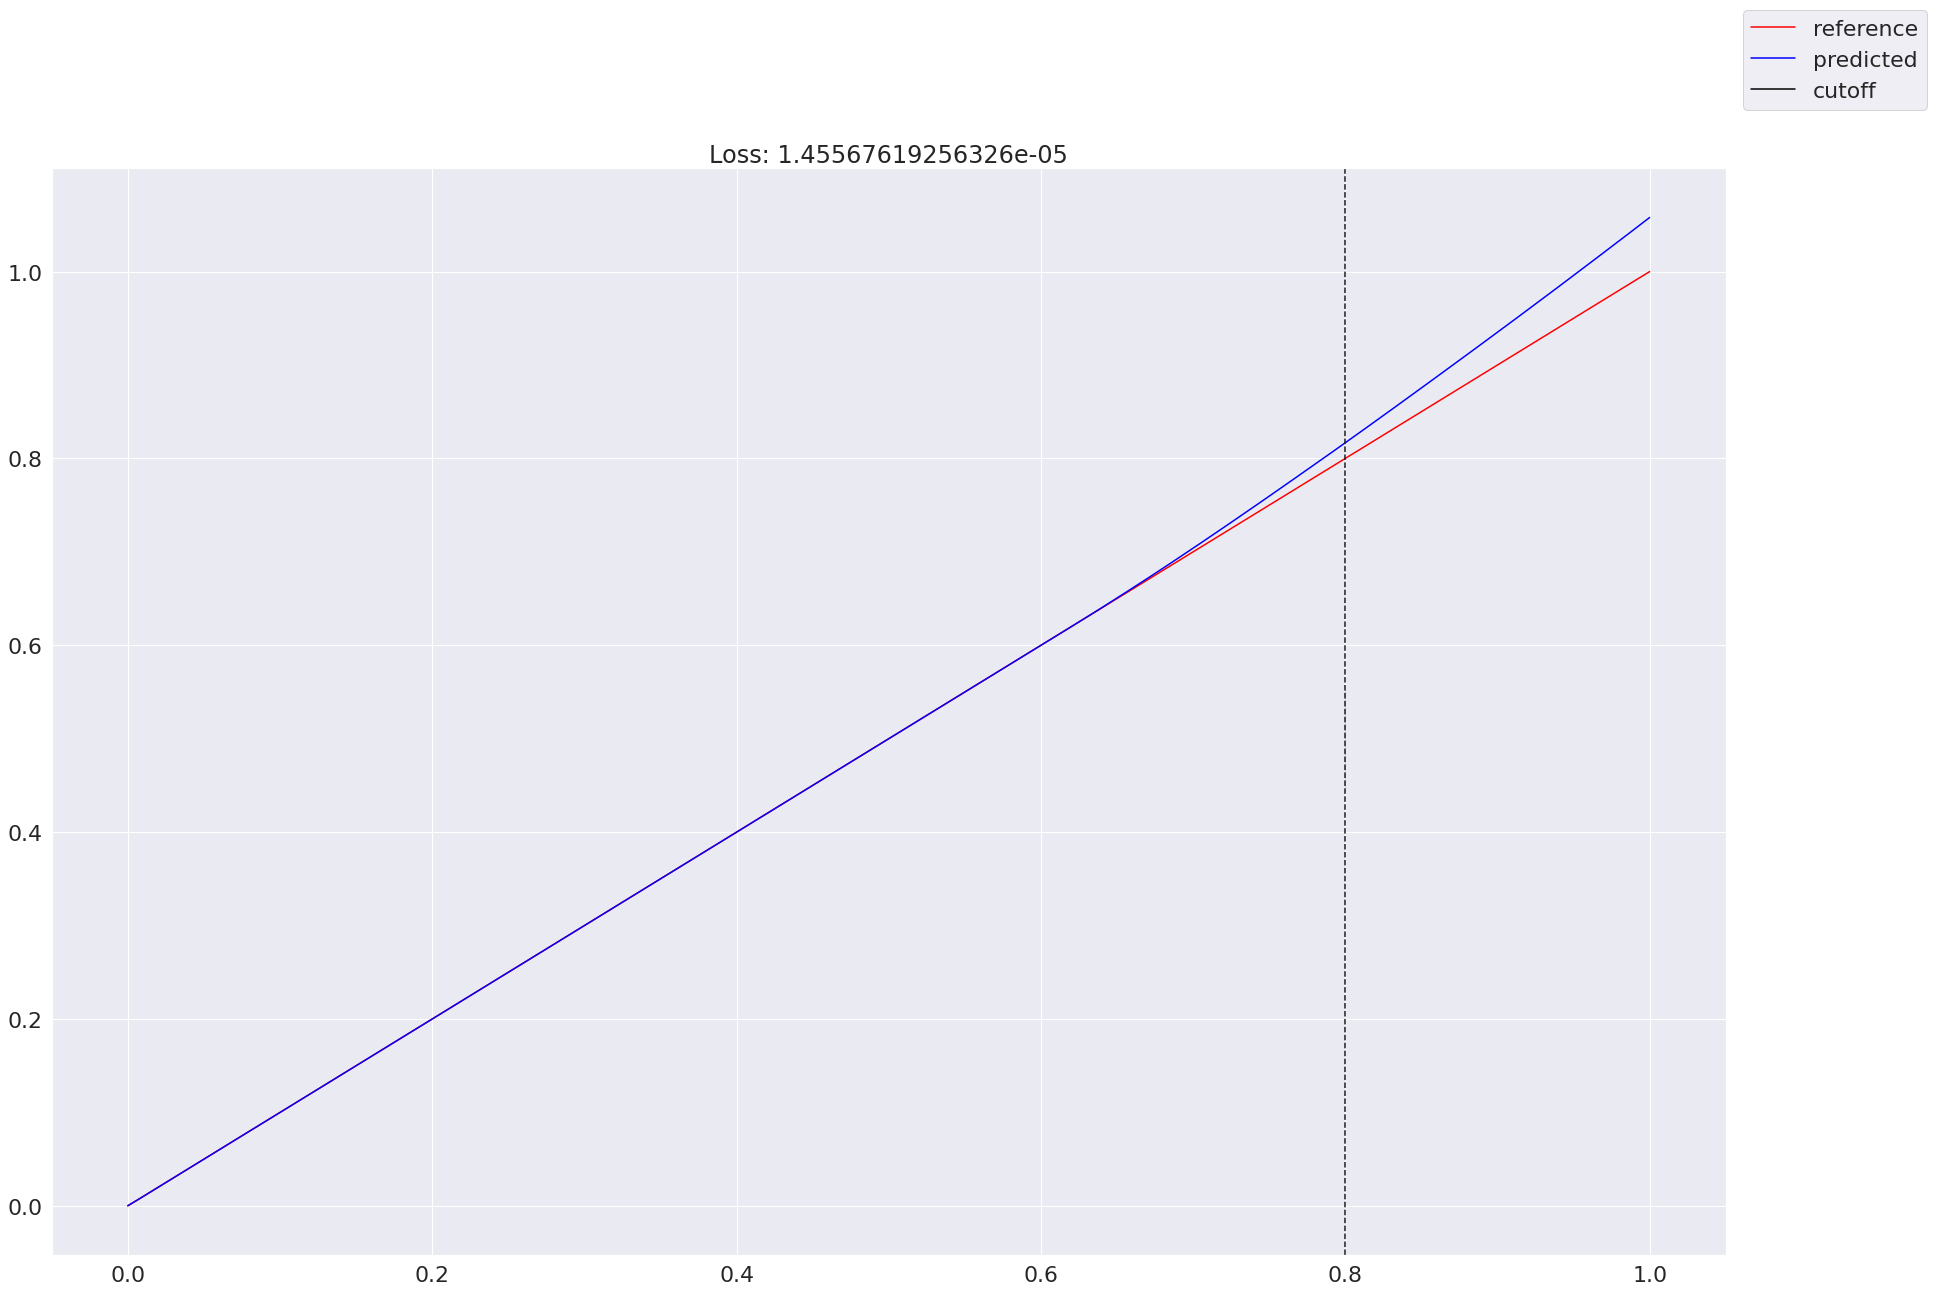

In [19]:
dims = (30, 20)
fig, ax = pyplot.subplots(figsize=dims)
predicted = model.predict(grid).reshape((150,))

sns.lineplot(x=grid, y=grid, color="red")
sns.lineplot(data=predictions, x=grid, y=predicted, color="blue")
sns.lineplot(data=predictions, x=np.ones(150) * 0.8, y=np.linspace(-0.1, 1.1, 150), color="black")
plt.axvline(0.8, color='k', linestyle='--')
ax.set_title("Loss: {}".format(loss))
fig.legend(labels=['reference', 'predicted', 'cutoff'])